<a href="https://colab.research.google.com/github/karman07/all_ml_dl_r/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X = X / 255.0

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.9202142857142858


In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.9676428571428571


In [5]:
import tensorflow as tf
from tensorflow import keras

# Reshape for CNN input if needed, else use as is
X_train_dl = X_train.values.reshape(-1, 28, 28, 1)
X_test_dl = X_test.values.reshape(-1, 28, 28, 1)
y_train_dl = keras.utils.to_categorical(y_train, 10)
y_test_dl = keras.utils.to_categorical(y_test, 10)

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.8623 - loss: 0.4528 - val_accuracy: 0.9718 - val_loss: 0.0909
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9852 - val_loss: 0.0496
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 85s 56ms/step - accuracy: 0.9860 - loss: 0.0424 - val_accuracy: 0.9886 - val_loss: 0.0370
Epoch 4/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9884 - val_loss: 0.0347
Epoch 5/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9929 - loss: 0.0240 - val_accuracy: 0.9905 - val_loss: 0.0314


In [7]:
test_loss, test_acc = model.evaluate(X_test_dl, y_test_dl)
print("CNN Test Accuracy:", test_acc)

438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9874 - loss: 0.0338
CNN Test Accuracy: 0.9879999756813049


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


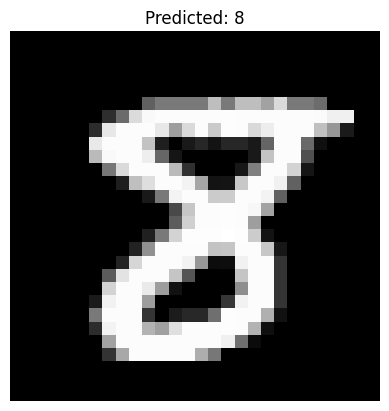

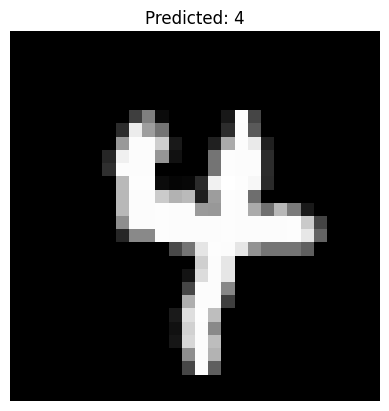

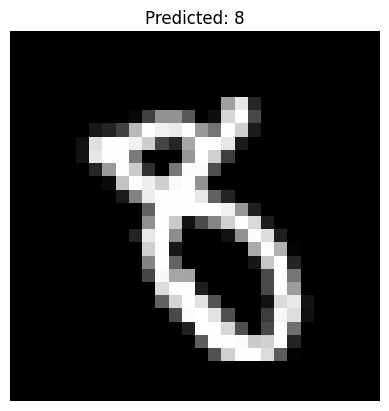

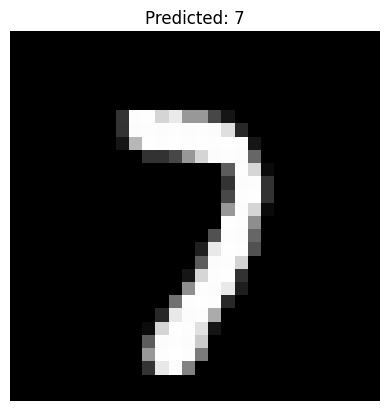

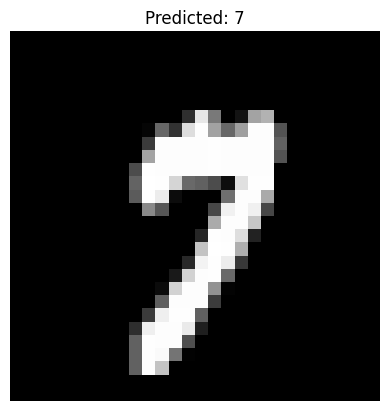

In [8]:
import matplotlib.pyplot as plt

# Predict first 5 test samples
predictions = model.predict(X_test_dl[:5])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(X_test_dl[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()